### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re

from collections import Counter

In [2]:
# Load the dataset

df = pd.read_csv("spam.csv",encoding='latin-1')
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [3]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True) # drop the columns

In [7]:
df.head()

v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [4]:
df.columns = ["class","message"] # change the column name

In [9]:
df.head()

class                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [7]:
df["len"] = [len(text) for text in df.message]

In [8]:
df.head()

class                                            message  len
0   ham  Go until jurong point, crazy.. Available only ...  111
1   ham                      Ok lar... Joking wif u oni...   29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...  155
3   ham  U dun say so early hor... U c already then say...   49
4   ham  Nah I don't think he goes to usf, he lives aro...   61

In [9]:
df.describe()

len
count  5572.000000
mean     80.118808
std      59.690841
min       2.000000
25%      36.000000
50%      61.000000
75%     121.000000
max     910.000000

In [10]:
df.groupby('class').describe()

len                                                         
        count        mean        std   min    25%    50%    75%    max
class                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

In [11]:
df["class"].value_counts()/df["class"].shape[0]*100

ham     86.593683
spam    13.406317
Name: class, dtype: float64

### Word Cloud

In [5]:
stopwords_list = nltk.corpus.stopwords.words("english") # stopwords list for english
tokener = nltk.word_tokenize # to tokenize

In [13]:
common_words={'word':[],'count':[]}

for word in df['message']:
    tok = tokener(word)
    #print(tok)
    m_counter = Counter(tok)
    # print(m_counter)
    # print(m_counter.most_common(1))
    common_words['word'].append(m_counter.most_common(1)[0][0])
    common_words['count'].append(m_counter.most_common(1)[0][1])
    #print("=============")

In [14]:
common_words_df = pd.concat([df,pd.DataFrame(common_words)],axis=1)
common_words_df

class                                            message  len  word  \
0      ham  Go until jurong point, crazy.. Available only ...  111   ...   
1      ham                      Ok lar... Joking wif u oni...   29   ...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...  155    to   
3      ham  U dun say so early hor... U c already then say...   49     U   
4      ham  Nah I don't think he goes to usf, he lives aro...   61    he   
...    ...                                                ...  ...   ...   
5567  spam  This is the 2nd time we have tried 2 contact u...  161     .   
5568   ham              Will Ì_ b going to esplanade fr home?   37  Will   
5569   ham  Pity, * was in mood for that. So...any other s...   57  Pity   
5570   ham  The guy did some bitching but I acted like i'd...  125   The   
5571   ham                         Rofl. Its true to its name   26  Rofl   

      count  
0         2  
1         2  
2         3  
3         2  
4         2  
...     ...  
5567      3  
5568      1  
5569      1  
5570      1  
5571      1  

[5572 rows x 5 columns]

In [15]:
#! pip install wordcloud

In [16]:
#' '.join(common_words_df['word'])
# This will join the words column in to a single paragraph or corpus, with a space as sepration between each words.

In [17]:
import wordcloud
words_cloud = wordcloud.WordCloud().generate_from_text(' '.join(common_words_df['word']))

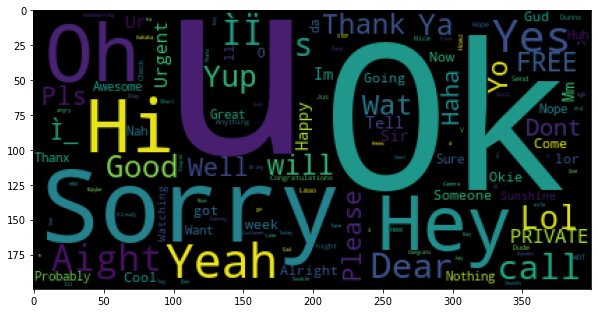

In [18]:
plt.figure(figsize=(10,6))
plt.imshow(words_cloud)

In [19]:
df.head()

class                                            message  len
0   ham  Go until jurong point, crazy.. Available only ...  111
1   ham                      Ok lar... Joking wif u oni...   29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...  155
3   ham  U dun say so early hor... U c already then say...   49
4   ham  Nah I don't think he goes to usf, he lives aro...   61

In [20]:
df.drop(["len"],axis=1,inplace=True)

# Basic exploration is over, so removing the dataset.

In [21]:
df.head()

class                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [6]:
def remove_punch(text):
    clean_words = re.sub(r"[^a-zA-Z0-9]"," ",text.lower())
    return clean_words

df.message = df.message.apply(remove_punch)

In [11]:
df.message

0       go until jurong point  crazy   available only ...
1                           ok lar    joking wif u oni   
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor    u c already then say   
4       nah i don t think he goes to usf  he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will    b going to esplanade fr home 
5569    pity    was in mood for that  so   any other s...
5570    the guy did some bitching but i acted like i d...
5571                           rofl  its true to its name
Name: message, Length: 5572, dtype: object

In [7]:
def remove_whitespace(text):
    cleaned_space = re.sub(' +'," ",text)
    return cleaned_space
df.message = df.message.apply(remove_whitespace)

# The ' +' means that there may be one space, two space, three space or even more. So, + will take any number of space.

In [25]:
df.message

0       go until jurong point crazy available only in ...
1                                ok lar joking wif u oni 
2       free entry in 2 a wkly comp to win fa cup fina...
3            u dun say so early hor u c already then say 
4       nah i don t think he goes to usf he lives arou...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                   will b going to esplanade fr home 
5569    pity was in mood for that so any other suggest...
5570    the guy did some bitching but i acted like i d...
5571                            rofl its true to its name
Name: message, Length: 5572, dtype: object

In [8]:
def remove_stopwords(text):
    tok_word = tokener(text)
    clean_words=[]
    for word in tok_word:
        if word in stopwords_list:
            continue
        else: 
            clean_words.append(word)
    words = ' '.join(clean_words)
    return words

df.message = df.message.apply(remove_stopwords)

In [17]:
df.message

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u 750 pound prize 2...
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object

In [18]:
ham_class = df[df['class']=="ham"]
spam_class = df[df['class']=="spam"]

In [19]:
ham_class.message

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
6          even brother like speak treat like aids patent
                              ...                        
5565                                              huh lei
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: message, Length: 4825, dtype: object

In [30]:
ham_text = ' '.join(ham_class.message)
spam_text = ' '.join(spam_class.message)

In [31]:
ham_words_cloud = wordcloud.WordCloud().generate_from_text(ham_text)
spam_words_cloud = wordcloud.WordCloud().generate_from_text(spam_text)

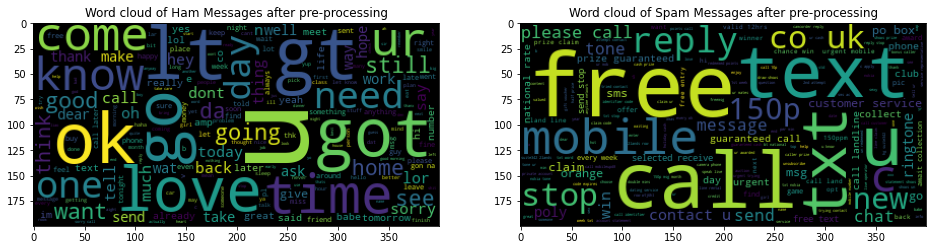

In [32]:
plt.figure(figsize=(16,12))
plt.subplot(121)  # 1 Indicates axis 1 image, 2 Indicates 2 sub images, Last 1 indicates 1st image out of two.
plt.title("Word cloud of Ham Messages after pre-processing")
plt.imshow(ham_words_cloud)
plt.subplot(122)
plt.title("Word cloud of Spam Messages after pre-processing")
plt.imshow(spam_words_cloud)

In [9]:
def remove_digits(text):
    clean_words = re.sub(r"[^a-zA-Z]"," ",text.lower())
    return clean_words

df.message = df.message.apply(remove_digits)

In [21]:
df.message[2]

'free entry   wkly comp win fa cup final tkts   st may      text fa       receive entry question std txt rate c apply            over  '

In [10]:
df.message = df.message.apply(remove_whitespace)

In [23]:
df.message[2]

'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply over '

In [12]:
lm=nltk.WordNetLemmatizer()

In [13]:
def lemma(text):
    tok_word = tokener(text)
    lemma_word =[]
    # print("token :",tok_word)
    for tok in tok_word:
        lemma_tok = lm.lemmatize(tok)
        lemma_word.append(lemma_tok)
    # print("lemmatization :",lemma_word)
    final_text= " ".join(lemma_word)
    # print("Final text :",final_text)
    return final_text

In [14]:
df.message = df.message.apply(lemma)

# Bag Of Words

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english',max_features=2500,ngram_range=(1,2))
scaled_X = cv.fit_transform(df.message)

# max_eatures=2500 will ensure only the top 2500 words with maximum frequency will be taken.

In [44]:
df_bow_sklearn = pd.DataFrame(scaled_X.toarray(),columns=cv.get_feature_names())
df_bow_sklearn.head()

c:\Users\LAP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


aathi  abiola  able  abt  ac  acc  accept  access  accidentally  account  \
0      0       0     0    0   0    0       0       0             0        0   
1      0       0     0    0   0    0       0       0             0        0   
2      0       0     0    0   0    0       0       0             0        0   
3      0       0     0    0   0    0       0       0             0        0   
4      0       0     0    0   0    0       0       0             0        0   

   ...  ym  yo  yo yo  yoga  yogasana  yr  yun  yup  yup thk  zed  
0  ...   0   0      0     0         0   0    0    0        0    0  
1  ...   0   0      0     0         0   0    0    0        0    0  
2  ...   0   0      0     0         0   0    0    0        0    0  
3  ...   0   0      0     0         0   0    0    0        0    0  
4  ...   0   0      0     0         0   0    0    0        0    0  

[5 rows x 2500 columns]

In [16]:
df['class'] = df['class'].map({'spam':1,'ham':0})

In [46]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_bow_sklearn,df['class'],test_size=0.3,random_state=42)

In [47]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
y_pred = clf.predict(X_test)

In [49]:
# metrics
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.9736842105263158

In [51]:
clf.score(X_train,y_train)

0.9997435897435898

In [52]:
clf.score(X_test,y_test)

0.9736842105263158

In [ ]:
# Precision must be important for this problem.

# TF-IDF

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(ngram_range=(1,3),max_features=2500)
scaled_X_tf =  tf_idf.fit_transform(df.message)

In [54]:
df_tfidf_sklearn = pd.DataFrame(scaled_X_tf.toarray(),columns=tf_idf.get_feature_names())
df_tfidf_sklearn.head()

c:\Users\LAP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


aathi  abiola  able  abt   ac  acc  accept  access  account  \
0    0.0     0.0   0.0  0.0  0.0  0.0     0.0     0.0      0.0   
1    0.0     0.0   0.0  0.0  0.0  0.0     0.0     0.0      0.0   
2    0.0     0.0   0.0  0.0  0.0  0.0     0.0     0.0      0.0   
3    0.0     0.0   0.0  0.0  0.0  0.0     0.0     0.0      0.0   
4    0.0     0.0   0.0  0.0  0.0  0.0     0.0     0.0      0.0   

   account statement  ...  yet  yijue   ym   yo  yoga  yogasana   yr  yun  \
0                0.0  ...  0.0    0.0  0.0  0.0   0.0       0.0  0.0  0.0   
1                0.0  ...  0.0    0.0  0.0  0.0   0.0       0.0  0.0  0.0   
2                0.0  ...  0.0    0.0  0.0  0.0   0.0       0.0  0.0  0.0   
3                0.0  ...  0.0    0.0  0.0  0.0   0.0       0.0  0.0  0.0   
4                0.0  ...  0.0    0.0  0.0  0.0   0.0       0.0  0.0  0.0   

   yup  zed  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 2500 columns]

In [55]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_tfidf_sklearn,df['class'],test_size=0.3,random_state=42)

In [56]:
clf_tfidf = RandomForestClassifier()
clf_tfidf.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
clf_tfidf.score(X_train,y_train)

0.9997435897435898

In [58]:
clf_tfidf.score(X_test,y_test)

0.9796650717703349

# Word2Vec

In [1]:
# ! pip install gensim

In [ ]:
# from gensim.utils import simple_preprocess

# simple_preprocess can be used for removing stop words and making the sentence into small letter.

In [17]:
df.head()

class                                            message
0      0  go jurong point crazy available bugis n great ...
1      0                            ok lar joking wif u oni
2      1  free entry wkly comp win fa cup final tkts st ...
3      0                u dun say early hor u c already say
4      0                nah think go usf life around though

In [18]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
classlist=[]
words=[]
for sent,classVal in zip(df['message'],df['class']):
    sent_token = sent_tokenize(sent)
    
    for sent in sent_token:
        words.append(simple_preprocess(sent))
        classlist.append(classVal)

In [19]:
words[:5]

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'oni'],
 ['free',
  'entry',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'apply',
  'over'],
 ['dun', 'say', 'early', 'hor', 'already', 'say'],
 ['nah', 'think', 'go', 'usf', 'life', 'around', 'though']]

In [ ]:
import gensim.downloader as api 
wv=api.load("word2vec-google-news-300")

# This contain 300 dimensions or feature set for each words and this pretrained model is provided by Google.
# When we create our own custom trained model, it only have 100 dimensions as default.

In [20]:
import gensim
model = gensim.models.Word2Vec(words,window=5,min_count=2)

# min_count's default value is 5, but here 2 is given. It means that when one word is taken, it must be used at least 2 times in the entire corpus, or if not, then the word will be removed. This is applicable to every word in the corpus.
# By default sg=0, which indicates this word2vec works in continous bag of words. For using skipgram, give sg=1.

In [21]:
len(words)

5564

In [22]:
model.corpus_count

5564

In [23]:
df.shape

(5572, 2)

In [25]:
model.epochs

5

In [26]:
model.wv.similar_by_word('world')

[('say', 0.9995479583740234),
 ('tell', 0.9995071291923523),
 ('back', 0.9994918704032898),
 ('like', 0.999489426612854),
 ('one', 0.9994885921478271),
 ('feel', 0.9994764924049377),
 ('today', 0.9994762539863586),
 ('said', 0.9994754195213318),
 ('need', 0.9994741082191467),
 ('ur', 0.9994692206382751)]

In [27]:
model.wv['say']

array([-2.62742102e-01,  5.37917674e-01,  1.77394897e-01, -8.75863712e-03,
        7.27430806e-02, -7.17923403e-01,  3.17944229e-01,  1.04658484e+00,
       -4.04270232e-01, -3.13855410e-01, -1.98687151e-01, -7.55805254e-01,
       -2.48492416e-02,  2.42025197e-01,  1.19640231e-01, -4.18323398e-01,
       -6.01484021e-03, -6.19299054e-01,  4.63777967e-02, -8.64396989e-01,
        2.55793601e-01,  3.31247002e-01,  1.45124659e-01, -1.03516601e-01,
       -1.56379491e-01,  2.73403730e-02, -4.18824703e-01, -4.42161620e-01,
       -4.14265990e-01,  1.69706419e-01,  3.91805261e-01,  8.78267512e-02,
        9.90537852e-02, -2.78347313e-01, -2.09806025e-01,  6.07431114e-01,
        4.57818732e-02, -4.77384686e-01, -3.16627413e-01, -8.57394874e-01,
       -5.20785227e-02, -4.20852005e-01, -1.12095796e-01,  9.32928324e-02,
        4.49781626e-01, -2.25200325e-01, -4.06053066e-01, -1.08793922e-01,
        1.74626589e-01,  3.51637632e-01,  2.19736010e-01, -5.96301675e-01,
       -7.76918977e-02, -

In [36]:
model.wv.index_to_key

['call',
 'get',
 'ur',
 'gt',
 'lt',
 'go',
 'ok',
 'day',
 'free',
 'know',
 'got',
 'come',
 'like',
 'time',
 'good',
 'text',
 'love',
 'want',
 'send',
 'txt',
 'need',
 'one',
 'today',
 'going',
 'home',
 'stop',
 'lor',
 'sorry',
 'see',
 'still',
 'mobile',
 'take',
 'back',
 'da',
 'reply',
 'think',
 'dont',
 'tell',
 'week',
 'phone',
 'hi',
 'new',
 'later',
 'pls',
 'please',
 'co',
 'msg',
 'min',
 'dear',
 'make',
 'night',
 'message',
 'say',
 'well',
 'thing',
 'much',
 'claim',
 'great',
 'hope',
 'oh',
 'hey',
 'number',
 'na',
 'happy',
 'friend',
 'wat',
 'work',
 'give',
 'way',
 'yes',
 'www',
 'let',
 'prize',
 'wan',
 'right',
 'tomorrow',
 'already',
 'tone',
 'ask',
 'cash',
 'said',
 'win',
 'yeah',
 'really',
 'life',
 'amp',
 'meet',
 'babe',
 'im',
 'find',
 'morning',
 'uk',
 'year',
 'miss',
 'service',
 'last',
 'thanks',
 'would',
 'com',
 'nokia',
 'anything',
 'also',
 'lol',
 'care',
 'every',
 'feel',
 'pick',
 'keep',
 'sure',
 'contact',
 'sen

In [29]:
def avg_word2vec(doc):
    outResult=np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)
    return(outResult)

In [30]:
X=[]
for i in  range(len(words)):
    X.append(avg_word2vec(words[i]))

c:\Users\LAP\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\LAP\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [31]:
X[73]

nan

In [33]:
words[73]

['performed']

In [34]:
df['message'][73]

'k k performed'

In [35]:
[model.wv[word] for word in words[73] if word in model.wv.index_to_key]

[]

In [38]:
# The above function is not used as it will not tackle the problem of null value, that is if any array is null, then it will create a problem
# when converting the array list X, into a data frame. So, below function is used to get the mean as well as empty arrays seperated.

In [39]:
def avg_word2vec(doc):
    val=[model.wv[word] for word in doc if word in model.wv.index_to_key]
    if len(val) !=0:
        outResult = np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)
    else:
        outResult=np.asarray([])
    return outResult

In [40]:
X=[]
for i in  range(len(words)):
    X.append(avg_word2vec(words[i]))

In [44]:
X[73]

array([], dtype=float64)

In [45]:
X = [arr.tolist() for arr in X]

In [46]:
X

[[-0.13677357137203217,
  0.2766748368740082,
  0.0971471443772316,
  -0.005762289743870497,
  0.03768053278326988,
  -0.3716231882572174,
  0.15819399058818817,
  0.5300700068473816,
  -0.20091740787029266,
  -0.16652178764343262,
  -0.09517043828964233,
  -0.38677978515625,
  -0.015585859306156635,
  0.12649716436862946,
  0.06501569598913193,
  -0.2100890427827835,
  -0.007495202124118805,
  -0.31833362579345703,
  0.02881558984518051,
  -0.4406602084636688,
  0.12440195679664612,
  0.16192470490932465,
  0.06738446652889252,
  -0.05375449359416962,
  -0.08057206869125366,
  0.011254199780523777,
  -0.21639995276927948,
  -0.22951291501522064,
  -0.20924992859363556,
  0.08925143629312515,
  0.19624149799346924,
  0.046774376183748245,
  0.044986139982938766,
  -0.13524186611175537,
  -0.10837024450302124,
  0.31080999970436096,
  0.0256359800696373,
  -0.24277685582637787,
  -0.16055020689964294,
  -0.434877872467041,
  -0.019947156310081482,
  -0.2164546251296997,
  -0.06033106148

In [48]:
Final_X=[]
labels_y=[]
for X_val,classVal in zip(X,classlist):
    if len(X_val)!=0:
        Final_X.append(X_val)
        labels_y.append(classVal)

In [49]:
len(Final_X)

5541

In [50]:
Final_X

[[-0.13677357137203217,
  0.2766748368740082,
  0.0971471443772316,
  -0.005762289743870497,
  0.03768053278326988,
  -0.3716231882572174,
  0.15819399058818817,
  0.5300700068473816,
  -0.20091740787029266,
  -0.16652178764343262,
  -0.09517043828964233,
  -0.38677978515625,
  -0.015585859306156635,
  0.12649716436862946,
  0.06501569598913193,
  -0.2100890427827835,
  -0.007495202124118805,
  -0.31833362579345703,
  0.02881558984518051,
  -0.4406602084636688,
  0.12440195679664612,
  0.16192470490932465,
  0.06738446652889252,
  -0.05375449359416962,
  -0.08057206869125366,
  0.011254199780523777,
  -0.21639995276927948,
  -0.22951291501522064,
  -0.20924992859363556,
  0.08925143629312515,
  0.19624149799346924,
  0.046774376183748245,
  0.044986139982938766,
  -0.13524186611175537,
  -0.10837024450302124,
  0.31080999970436096,
  0.0256359800696373,
  -0.24277685582637787,
  -0.16055020689964294,
  -0.434877872467041,
  -0.019947156310081482,
  -0.2164546251296997,
  -0.06033106148

In [52]:
df = pd.DataFrame(Final_X)
df[100]=labels_y

In [53]:
df

0         1         2         3         4         5         6    \
0    -0.136774  0.276675  0.097147 -0.005762  0.037681 -0.371623  0.158194   
1    -0.088038  0.185408  0.063590 -0.001257  0.026479 -0.254534  0.107296   
2    -0.128339  0.253441  0.082409 -0.001967  0.038186 -0.335687  0.143861   
3    -0.170895  0.349614  0.119818 -0.005841  0.047710 -0.461805  0.200210   
4    -0.160583  0.325287  0.119328 -0.012975  0.047488 -0.439379  0.188601   
...        ...       ...       ...       ...       ...       ...       ...   
5536 -0.165795  0.340212  0.107987 -0.003888  0.052068 -0.452331  0.197155   
5537 -0.148360  0.285547  0.106546 -0.012940  0.035902 -0.390261  0.166219   
5538 -0.026433  0.049941  0.021551 -0.000376  0.004732 -0.068957  0.024933   
5539 -0.149535  0.302542  0.103045 -0.005937  0.044551 -0.401591  0.171689   
5540 -0.107486  0.207546  0.068034 -0.003650  0.020382 -0.272561  0.116279   

           7         8         9    ...       91        92        93   \
0     0.530070 -0.200917 -0.166522  ...  0.187925 -0.010868  0.082286   
1     0.368390 -0.137110 -0.112384  ...  0.132473 -0.006851  0.054224   
2     0.482505 -0.179523 -0.143756  ...  0.171779 -0.010938  0.071640   
3     0.673065 -0.257612 -0.203482  ...  0.233942 -0.008104  0.108124   
4     0.636461 -0.244212 -0.196374  ...  0.221763 -0.009608  0.096705   
...        ...       ...       ...  ...       ...       ...       ...   
5536  0.652704 -0.243171 -0.192896  ...  0.235721 -0.014800  0.094787   
5537  0.564428 -0.215730 -0.177711  ...  0.193728 -0.010026  0.082951   
5538  0.106980 -0.038537 -0.034500  ...  0.029131 -0.000245  0.011124   
5539  0.579979 -0.217773 -0.172396  ...  0.205620 -0.010410  0.086276   
5540  0.395575 -0.149646 -0.112501  ...  0.135559 -0.007544  0.060070   

           94        95        96        97        98        99   100  
0     0.423031  0.259792  0.155699 -0.251562  0.145530 -0.015566    0  
1     0.293373  0.179805  0.110647 -0.176880  0.101763 -0.005320    0  
2     0.382241  0.238453  0.133764 -0.221937  0.134549 -0.008999    1  
3     0.539228  0.323451  0.200345 -0.315713  0.178834 -0.019436    0  
4     0.504601  0.305754  0.185463 -0.301915  0.173752 -0.021071    0  
...        ...       ...       ...       ...       ...       ...  ...  
5536  0.523297  0.325012  0.177851 -0.305155  0.179775 -0.011044    1  
5537  0.445747  0.271846  0.167598 -0.266342  0.158451 -0.014477    0  
5538  0.080334  0.047213  0.025315 -0.044678  0.030394 -0.005920    0  
5539  0.465872  0.286567  0.168598 -0.271706  0.158970 -0.012987    0  
5540  0.317018  0.189225  0.114715 -0.192834  0.104452 -0.013026    0  

[5541 rows x 101 columns]

In [54]:
# train Test split

X_cleaned = df.drop([100],axis=1)
y_cleaned=df[100]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_cleaned,y_cleaned,test_size=0.3,random_state=42)

In [56]:
from sklearn.ensemble import RandomForestClassifier
clf_word2vec = RandomForestClassifier()
clf_word2vec.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
clf_word2vec.score(X_train,y_train)

1.0

In [58]:
clf_word2vec.score(X_test,y_test)

0.9542994588093806